In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
x=pd.read_csv("C:/Users/admin/Downloads/13.DelayedFlights.csv")
x

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [23]:
weather_cancelled_flights=x[x["CancellationCode"]=="B"]
monthly_cancellations=weather_cancelled_flights.groupby("Month").size()
month_with_most_cancellations=monthly_cancellations.idxmax()
print("The month with the most cancellatons due to bad weather is:", month_with_most_cancellations)

The month with the most cancellatons due to bad weather is: 12


In [8]:
top_10_diverted_routes=x[x['Diverted']==1].groupby(['Origin','Dest']).size().nlargest(10)
top_10_diverted_routes

Origin  Dest
ORD     LGA     39
DAL     HOU     35
DFW     LGA     33
ATL     LGA     32
MIA     LGA     31
ORD     SNA     31
SLC     SUN     31
BUR     JFK     29
HRL     HOU     28
BUR     DFW     25
dtype: int64

In [9]:
top_5_visited_destinations=x['Dest'].value_counts().head(5)
top_5_visited_destinations

ORD    108984
ATL    106898
DFW     70657
DEN     63003
LAX     59969
Name: Dest, dtype: int64

In [10]:
average_departure_delay_for_each_airline=x.groupby('UniqueCarrier')['DepDelay'].mean()
average_departure_delay_for_each_airline

UniqueCarrier
9E    47.370338
AA    46.481953
AQ    26.680000
AS    38.300435
B6    55.030570
CO    43.138680
DL    39.059306
EV    48.308463
F9    27.701227
FL    42.535239
HA    33.124433
MQ    43.726198
NW    41.306088
OH    48.937311
OO    44.790943
UA    49.985710
US    38.806187
WN    34.718587
XE    50.098444
YV    55.430655
Name: DepDelay, dtype: float64

In [11]:
highest_average_arrival_delay=x.groupby('Origin')['ArrDelay'].mean().idxmax()
highest_average_arrival_delay

'CMX'

In [13]:
flights_cancelled_for_each_day_of_week=x['DayOfWeek'].value_counts()
flights_cancelled_for_each_day_of_week

5    323259
1    290933
4    289451
7    286111
3    262805
2    260943
6    223256
Name: DayOfWeek, dtype: int64

<Axes: >

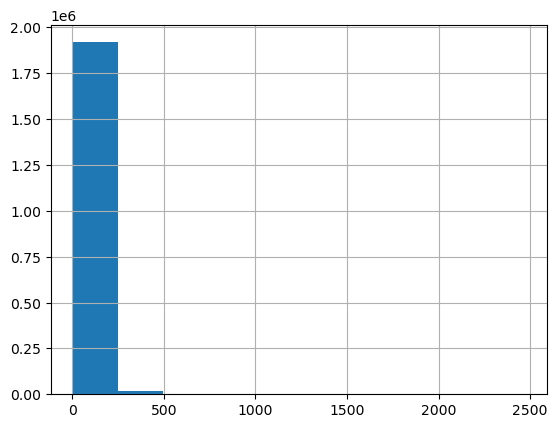

In [14]:
disytribution_of_departure_delays=x['DepDelay'].hist()
disytribution_of_departure_delays

In [15]:
flights_diverted_for_each_airline=x.groupby('UniqueCarrier')['Diverted'].sum()
flights_diverted_for_each_airline

UniqueCarrier
9E     258
AA     909
AQ       6
AS     272
B6     380
CO     426
DL     489
EV      86
F9      43
FL     308
HA      15
MQ     593
NW     249
OH     192
OO     564
UA     475
US     392
WN    1386
XE     470
YV     241
Name: Diverted, dtype: int64

In [16]:
highest_no_of_cancelled_flights=x[x['Cancelled']==1]['UniqueCarrier'].value_counts().idxmax()
highest_no_of_cancelled_flights

'MQ'

In [17]:
flights_diverted_each_carrier_and_month_combination=x.groupby(['UniqueCarrier','Month'])['Diverted'].sum()
flights_diverted_each_carrier_and_month_combination

UniqueCarrier  Month
9E             1        35
               2        43
               3        22
               4        13
               5        14
                        ..
YV             8        23
               9         7
               10       10
               11       20
               12       31
Name: Diverted, Length: 230, dtype: int64

In [18]:
day_of_week_had_highest_no_of_cancelled_flights=x[x['Cancelled']==1]['DayOfWeek'].value_counts().idxmax()
day_of_week_had_highest_no_of_cancelled_flights

2

In [20]:
highest_avg_departure_delay=x.groupby('DayOfWeek')['DepDelay'].mean().idxmax()
highest_avg_departure_delay

7

In [21]:
avg_arrival_delay=x.groupby('Origin')['ArrDelay'].mean()
avg_arrival_delay

Origin
ABE    60.820404
ABI    66.369898
ABQ    33.597238
ABY    50.907534
ACK    66.040816
         ...    
WYS    18.300000
XNA    57.084927
YAK    54.879397
YKM    25.581818
YUM    34.467249
Name: ArrDelay, Length: 303, dtype: float64

In [22]:
flights_diverted_each_month=x.groupby('Month')['Diverted'].sum()
flights_diverted_each_month

Month
1      612
2      909
3      726
4      481
5      361
6     1026
7      774
8      674
9      188
10     285
11     321
12    1397
Name: Diverted, dtype: int64